In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def display(img):
  fig=plt.figure(figsize=(12,10))
  ad = fig.add_subplot(111)
  
  ad.imshow(img,cmap='gray')
  
 

In [3]:
bike=cv2.imread('/Users/diviganesh/Downloads/bike.jpg')
bikes=cv2.imread('/Users/diviganesh/Downloads/bikes.jpg')


In [4]:
orb=cv2.ORB_create()
kp1,ds1=orb.detectAndCompute(bike,None)
kp2,ds2=orb.detectAndCompute(bikes,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True )


In [5]:
matches=bf.match(ds1,ds2)

matches=sorted(matches,key=lambda x:x.distance)

In [6]:
done=cv2.drawMatches(bike,kp1,bikes,kp2,matches[:25],None,flags=2)

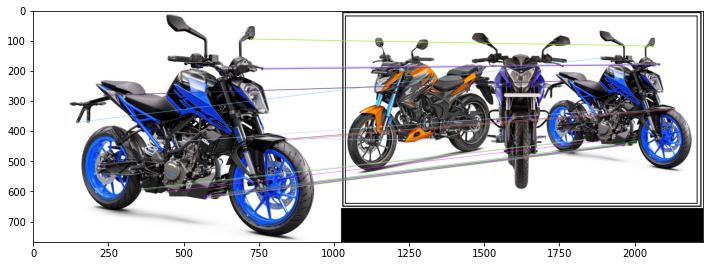

In [7]:
display(done)

In [8]:
sift=cv2.xfeatures2d.SIFT_create()

In [9]:
kp1,ds1=sift.detectAndCompute(bike,None)
kp2,ds2=sift.detectAndCompute(bikes,None)

In [10]:
bf=cv2.BFMatcher()

In [11]:
matches=bf.knnMatch(ds1,ds2,k=2)


In [12]:
matchesMask=[[0,0]for i in range(len(matches))]

In [13]:
good=[]
for i,(m1,m2) in enumerate(matches):
    if m1.distance<0.75*m2.distance:
        matchesMask[i]=[1,0]


In [14]:
draw=dict(matchColor=(0,225,0),singlePointColor=(225,0,0),matchesMask=matchesMask,flags=0)

In [15]:

final_pic=cv2.drawMatchesKnn(bike,kp1,bikes,kp2,matches,None,**draw)

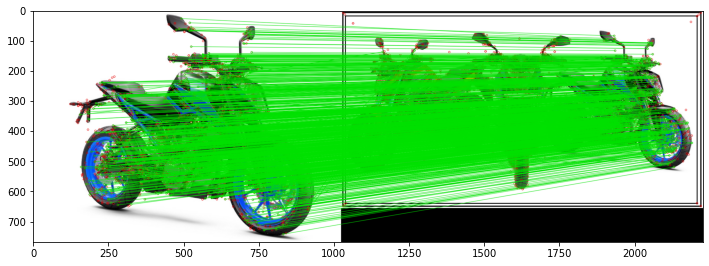

In [16]:
display(final_pic)

In [17]:
###Face detection

In [18]:
pic=cv2.imread('/Users/diviganesh/Downloads/group.jpg')

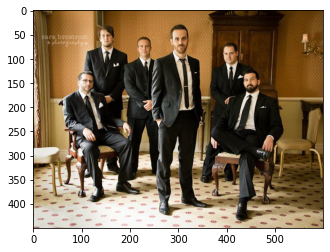

In [19]:
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
plt.imshow(pic,cmap='gray')

In [51]:
face_cascade=cv2.CascadeClassifier('/Users/diviganesh/Downloads/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')

In [21]:
def detect(img):
    face_img = img.copy()
    face_recog = face_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in face_recog:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(225,225,225),4 )
    return face_img    
        
    

In [22]:
result=detect(pic)

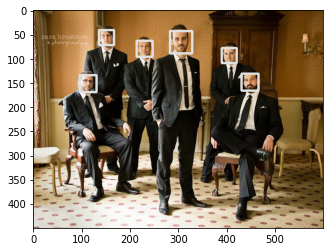

In [23]:
plt.imshow(result,cmap='gray')

In [24]:
def adj_detect(img):
    face_img = img.copy()
    face_recog = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=2)
    for(x,y,w,h) in face_recog:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(225,225,225),4 )
    return face_img    
        
    

In [25]:
adj_result=adj_detect(pic)

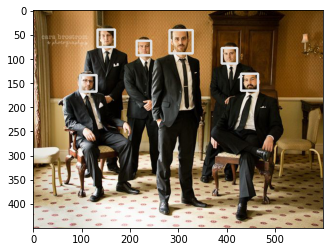

In [26]:
plt.imshow(adj_result,cmap='gray')

In [53]:
cam=cv2.VideoCapture(0)


while True:
    re,fr=cam.read(0)
    fr=adj_detect(fr)
    cv2.imshow('video face detection',fr)
    c=cv2.waitKey(5)
    if c==27:
        break 
    
cam.release()
cv2.destroyAllWindows()

In [63]:

cap=cv2.VideoCapture(0)
ret,f1=cap.read()
face_recog = face_cascade.detectMultiScale(f1)
(fx,fy,w,h)=tuple(face_recog[0])
track_window=(fx,fy,w,h)
roi = f1[fy:fy+h,fx:fx+w]
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist=cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,225,cv2.NORM_MINMAX)
term_crit=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
while True:
    ret,f1=cap.read()
    if ret==True:
        hsv=cv2.cvtColor(f1,cv2.COLOR_BGR2HSV)
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        
        ret,track_window=cv2.CamShift(dst,track_window,term_crit)
        pts=cv2.boxPoints(ret)
        pts=np.int0(pts)
        img2=cv2.polylines(f1,[pts],True,(0,0,225),5)
        
        


        cv2.imshow('img',img2)
        c=cv2.waitKey(5)
        if c==27:
            break 
    else:
        break


cv2.destroyAllWindows()
cam.release()
       
        